In [ ]:
ls -lh data

In [ ]:
!unzip data/data.zip -d data

In [ ]:
!wc data/data.json

In [ ]:
%%writefile subset_json.py
"""head_json.py - extract a couple records from a huge json file.

Syntax: python head_json.py < infile.json > outfile.json
"""

import sys

start_char = '{'
stop_char = '}'
n_records = 100
level_nesting = 0

while n_records != 0:
    ch = sys.stdin.read(1)
    sys.stdout.write(ch)
    if ch == start_char:
        level_nesting += 1
    if ch == stop_char:
        level_nesting -= 1
        if level_nesting == 0:
            n_records -= 1
sys.stdout.write(']')

In [ ]:
!python subset_json.py < data/data.json > data/subset.json

In [1]:
import pandas as pd

df = pd.read_json('data/data.json')

In [2]:
df.head().T


,0,1,2,3,4
acct_type,fraudster_event,premium,premium,premium,premium
approx_payout_date,1266062400,1296720000,1296172800,1388966400,1297900800
body_length,3852,3499,2601,12347,2417
channels,5,0,8,6,11
country,US,US,US,IE,US
currency,USD,USD,USD,EUR,USD
delivery_method,0,1,1,1,0
description,"<p><a href=""http://s432.photobucket.com/albums...","<p>Join us for a quick, one-night, community-b...","<h3><span class=""subcategory""><strong>Teacher ...","<p style=""margin-bottom: 1.3em; padding-bottom...",<p>Writers and filmmakers need to understand t...
email_domain,gmail.com,ruf.org,pvsd.k12.ca.us,irishtabletennis.com,artsandbusinesscouncil.org
event_created,1262739706,1293832670,1291090956,1360681570,1291994666


In [6]:
event_id = []
for idx, row in df.iterrows():
    if len(row['ticket_types']) == 0:
        event_id.append('x')
    else:
        eid = row['ticket_types'][0]['event_id']
        event_id.append(eid)

df['event_id'] = event_id

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [8]:
import matplotlib.pyplot as plt

In [9]:
df1 = pd.read_csv('data/final_columns.csv')

In [10]:
df1.head()

,body_length,channels,fb_published,has_logo,name_length,org_facebook,org_twitter,show_map,user_age,user_type,...,has_header_0.0,has_header_1.0,has_header_nan,yahoo,is_fr,is_org,delivery_method_0.0,delivery_method_1.0,delivery_method_3.0,delivery_method_nan
0,3852,5,0,0,60,0.0,0.0,1,36,1,...,0,1,0,0,0,0,1,0,0,0
1,3499,0,0,1,27,0.0,12.0,0,149,3,...,1,0,0,0,0,1,0,1,0,0
2,2601,8,0,0,28,0.0,0.0,0,214,3,...,0,0,1,0,0,0,0,1,0,0
3,12347,6,0,1,21,0.0,0.0,0,889,3,...,1,0,0,0,0,0,0,1,0,0
4,2417,11,1,0,66,0.0,0.0,0,35,3,...,1,0,0,0,0,1,1,0,0,0


/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


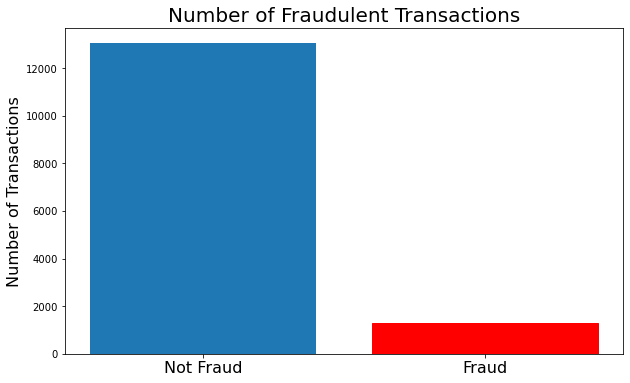

In [80]:
x=['Not Fraud', 'Fraud']
y = df1['Label'].value_counts()
y = [y[0], y[1]]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x,y)
ax.get_children()[1].set_color('r')
ax.set_title('Number of Fraudulent Transactions', fontsize=20)
ax.set_ylabel('Number of Transactions', fontsize=16)
ax.set_xticklabels(labels=x, fontsize=16);
plt.savefig('images/num_fraud.svg', transparent=False, bbox_inches='tight', format='svg', dpi=1200)

In [44]:
fraud = df1[df1['Label'] == 1]
not_fraud = df1[df1['Label'] == 0]

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   body_length          14337 non-null  int64  
 1   channels             14337 non-null  int64  
 2   fb_published         14337 non-null  int64  
 3   has_logo             14337 non-null  int64  
 4   name_length          14337 non-null  int64  
 5   org_facebook         14337 non-null  float64
 6   org_twitter          14337 non-null  float64
 7   show_map             14337 non-null  int64  
 8   user_age             14337 non-null  int64  
 9   user_type            14337 non-null  int64  
 10  Label                14337 non-null  int64  
 11  month                14337 non-null  int64  
 12  day                  14337 non-null  int64  
 13  hour                 14337 non-null  int64  
 14  minute               14337 non-null  int64  
 15  dayofyear            14337 non-null 

In [67]:
import json # to work with json file format
from bs4 import BeautifulSoup # to parse html
import string
import numpy as np

In [65]:
df['Description_string']=df.apply(lambda x: BeautifulSoup(x['description']).get_text().replace('\n',' '),axis=1)

df['org_desc_string']=df.apply(lambda x: BeautifulSoup(x['org_desc']).get_text().replace('\n',' '),axis=1)

/Users/sambuck92/opt/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:424: MarkupResemblesLocatorWarning: "http://montreal.shambhala.org/2011_2012/program/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [68]:
df['Description_string']= df['Description_string'].str.replace('[{}]'.format(string.punctuation), '')

df['org_desc']= df['org_desc'].str.replace('[{}]'.format(string.punctuation), '')
df['Label'] = np.where(df['acct_type'].str.contains('fraud'), 1, 0)

In [70]:

fraud = df[df['Label'] == 1]
nonfraud = df[df['Label'] == 0]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sambuck92/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         Frequency
Word              
event          385
tickets        303
one            276
party          264
us             255
new            249
•              240
help           239
time           224
course         223


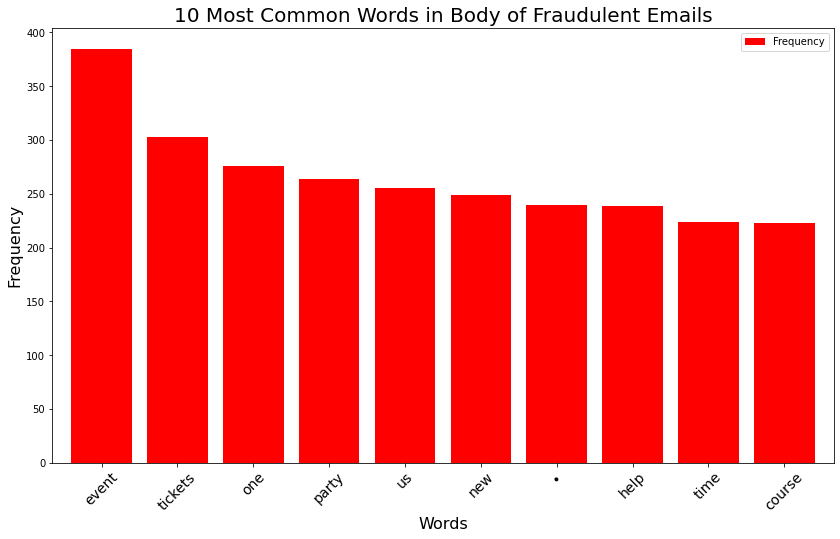

In [84]:
from collections import Counter
import pandas as pd
import nltk
nltk.download('stopwords')

top_N = 10



stopwords = nltk.corpus.stopwords.words(['english', 'spanish', 'french'])
# newStopWords = ('-',"'", '&', ',')
# for i in newStopWords:
#     stopwords.append(i)

# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (fraud.Description_string
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
fig, ax = plt.subplots(figsize=(14,8))
rslt.plot.bar(rot=0, width=0.8, ax=ax, color='r')
ax.set_title('10 Most Common Words in Body of Fraudulent Emails', fontsize=20)
ax.set_xlabel('Words', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.tick_params(axis='x', labelsize=14, labelrotation=45);
plt.savefig('images/fraud_words.svg', transparent=False, bbox_inches='tight', format='svg', dpi=1200)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sambuck92/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


          Frequency
Word               
event          8468
please         6136
new            6038
business       5885
us             5719
one            4979
tickets        4807
time           4711
–              4007
pm             3873


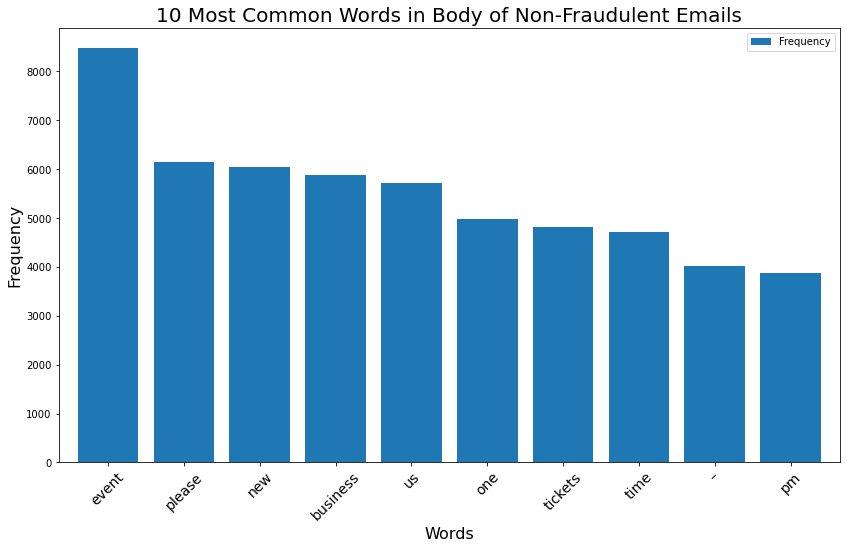

In [85]:
from collections import Counter
import pandas as pd
import nltk
nltk.download('stopwords')

top_N = 10



stopwords = nltk.corpus.stopwords.words(['english', 'spanish', 'french'])


# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (nonfraud.Description_string
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
fig, ax = plt.subplots(figsize=(14,8))
rslt.plot.bar(rot=0, width=0.8, ax=ax)
ax.set_title('10 Most Common Words in Body of Non-Fraudulent Emails', fontsize=20)
ax.set_xlabel('Words', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.tick_params(axis='x', labelsize=14, labelrotation=45);
plt.savefig('images/notfraud_words.svg', transparent=False, bbox_inches='tight', format='svg', dpi=1200)